<a href="https://colab.research.google.com/github/pp2444/ASA_Spring2021/blob/main/ASA_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Pavan Padubidri

netID: pp2444

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

# Q1

a) EM Scheme

In [368]:
def solveSDE_EM(h, t_final):
    N = int(np.ceil(t_final/h))
    t = np.linspace(0,t_final,N)

    dU = np.random.normal(size=N)
    dV = np.random.normal(size=N)
    dW = np.random.normal(size=N)

    X = np.zeros((3,N))
    X[:,0] = np.array([-5.91652, -5.52332,24.57231])

    for i in range(1,N):
        x,y,z = X[:,i-1]
        xi = np.random.choice([-1,1], p=[0.5,0.5])
        X[:,i] = X[:,i-1] + h * np.array([10*(y-x), x*(28-z) - y, x*y-z*8/3]) + np.sqrt(h) * np.array([dU[i], dV[i], dW[i]]) * xi
    return X


In [413]:
hs = np.logspace(-13, -4, num=10, base=2)
h=hs[9]
xs = []
for h in hs:
    X = solveSDE_EM(h, 1)
    xs.append(X[0,:])

err = [abs(np.mean(xs[i-1][::2] - xs[i])) for i in range(1, len(xs))]
slope, intercept = np.polyfit(np.log(err), np.log(hs[:-1]), 1)
print(f'EM order: {slope:0.2f}')

EM order: 1.09


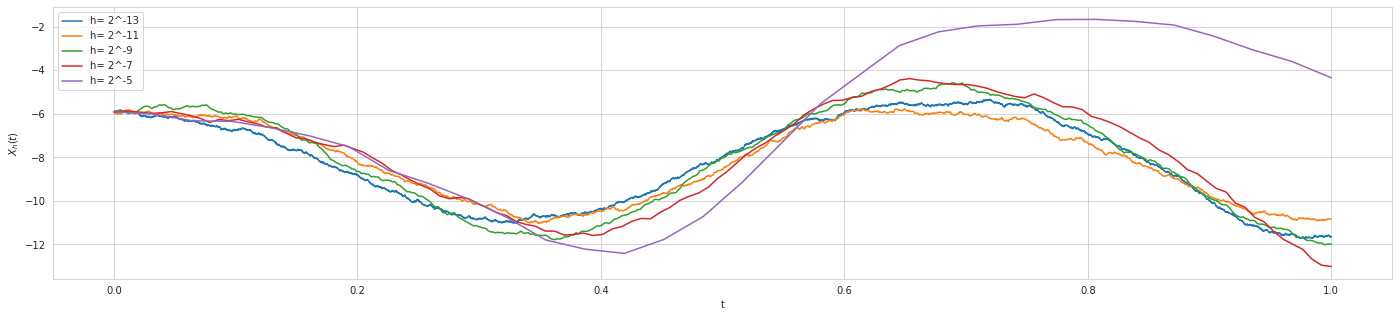

In [370]:
plt.figure(figsize=(24,5))
for h,x in zip(hs[::2],xs[::2]):
    plt.plot(np.linspace(0,1,int(np.ceil(1/h))), x, label=f'h= 2^{int(np.log(h)/np.log(2))}');
plt.xlabel('t')
plt.ylabel('$X_h(t)$')
plt.legend();

## Order of convergence of Scheme 1 is 1

b) Higher order Scheme

In [371]:
def solveSDE_HO(h, t_final):
    N = int(np.ceil(t_final/h))
    t = np.linspace(0,t_final,N)

    dU = np.random.normal(size=N)
    dV = np.random.normal(size=N)
    dW = np.random.normal(size=N)

    X = np.zeros((3,N))
    X[:,0] = np.array([-5.91652, -5.52332,24.57231])

    for i in range(1,N):
        x,y,z = X[:,i-1]
        xi = np.random.choice([-1,1], p=[0.5,0.5])
        X[:,i] = X[:,i-1] + h * np.array([10*(y-x), x*(28-z) - y, x*y-z*8/3]) + np.array([dU[i], dV[i], dW[i]]) * xi 
        + 0.5 * np.array([[-10,10,0],[28-z,-1,-x],[y,x,-8/3]]) * np.array([dU[i], dV[i], dW[i]]) * xi * h 
        + 0.5 * np.array([[-10,10,0],[28-z,-1,-x],[y,x,-8/3]]) * np.array([10*(y-x), x*(28-z) - y, x*y-z*8/3]) * h**2
    return X

In [396]:
hs = np.logspace(-13, -4, num=10, base=2)
h=hs[9]
xs = []
for h in hs:
    X = solveSDE_HO(h, 1)
    xs.append(X[0,:])
err = [abs(np.mean(xs[i-1][::2] - xs[i])) for i in range(1, len(xs))]
slope, intercept = np.polyfit(np.log(err), np.log(hs[:-1]), 1)
print(f'order: {slope:0.2f}')

order: 1.3


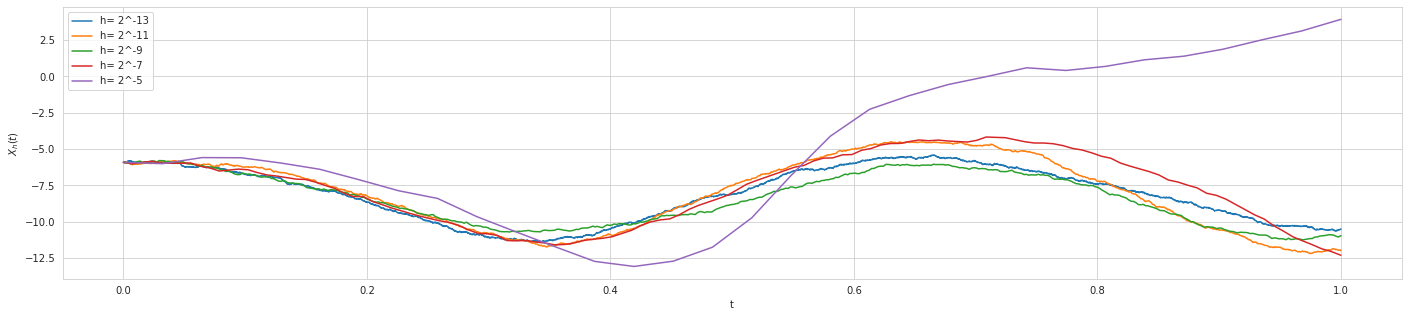

In [401]:
plt.figure(figsize=(24,5))
for h,x in zip(hs[::2],xs[::2]):
    plt.plot(np.linspace(0,1,int(np.ceil(1/h))), x, label=f'h= 2^{int(np.log(h)/np.log(2))}');
plt.xlabel('t')
plt.ylabel('$X_h(t)$')
plt.legend();

## Order of convergence of Scheme 2 is 1

c) RK scheme

In [404]:
def solveSDE_RK(h, t_final):
    N = int(np.ceil(t_final/h))
    t = np.linspace(0,t_final,N)

    dU = np.random.normal(size=N)
    dV = np.random.normal(size=N)
    dW = np.random.normal(size=N)

    X = np.zeros((3,N))
    X[:,0] = np.array([-5.91652, -5.52332,24.57231])

    for i in range(1,N):
        x,y,z = X[:,i-1]
        xi = np.random.choice([-1,1], p=[0.5,0.5])
        y1, y2, y3 = X[:,i-1] + h * np.array([10*(y-x), x*(28-z) - y, x*y-z*8/3]) + np.array([dU[i], dV[i], dW[i]]) * xi 

        X[:,i] = X[:,i-1] + h * 0.5 * (np.array([10*(y-x), x*(28-z) - y, x*y-z*8/3]) + np.array([10*(y2-y1), y1*(28-y3) - y2, y1*y2-y3*8/3]) )+ np.array([dU[i], dV[i], dW[i]]) * xi 
    return X

In [411]:
hs = np.logspace(-13, -4, num=10, base=2)
h=hs[9]
xs = []
for h in hs:
    X = solveSDE_RK(h, 1)
    xs.append(X[0,:])
err = [abs(np.mean(xs[i-1][::2] - xs[i])) for i in range(1, len(xs))]
slope, intercept = np.polyfit(np.log(err), np.log(hs[:-1]), 1)
print(f'order: {slope:0.2f}')

order: 1.94


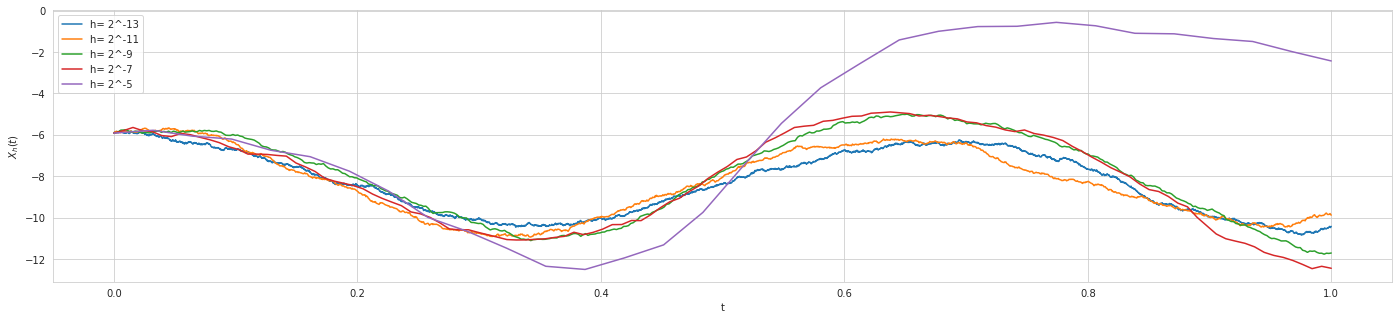

In [414]:
plt.figure(figsize=(24,5))
for h,x in zip(hs[::2],xs[::2]):
    plt.plot(np.linspace(0,1,int(np.ceil(1/h))), x, label=f'h= 2^{int(np.log(h)/np.log(2))}');
plt.xlabel('t')
plt.ylabel('$X_h(t)$')
plt.legend();

## Order of convergence of Scheme 2 is 2

# Q2

In [420]:
def get_g(A, x, b, n):
    gx = np.zeros(n)
    for i in range(50):
        j = np.random.choice(np.arange(n), 1)
        R = np.zeros((n,n))
        R[j,j] = n
        gx += 2*A.T @ R @ (A @ x - b)
    return 2*gx/n

In [ ]:
n = 40
iters = []
for n in np.arange(1,100, 10):
    A = np.random.normal(0, 1/n, (n,n))
    b = np.zeros(n)
    b[0] = 1
    xt = np.linalg.inv(A.T @ A) @ A.T @ b
    e_val, e_vec = np.linalg.eig(A.T @ A)
    eps = (1/(max(e_val))**2)/n**2
    x = np.ones(n)
    nrm = [np.linalg.norm(get_g(A,x,b,n))]
    X = [x]
    i=0
    while nrm[i]/nrm[0]>1e-1:
        gx = get_g(A,x,b,n)
        x = x - eps/100 * gx
        X.append(x)
        nrm.append(np.linalg.norm(gx))
        i += 1
        if i==10000:
            break
    iters.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in add
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


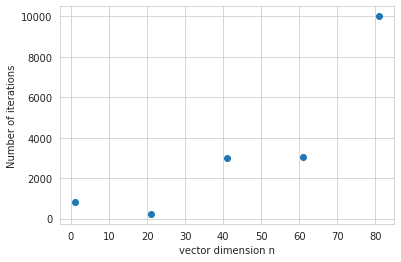

In [427]:
plt.scatter(np.arange(1,100,20), iters);
plt.xlabel('vector dimension n')
plt.ylabel('Number of iterations');

There's 